<a href="https://colab.research.google.com/github/sepehrnoory/EECS-700/blob/main/assignments/EmbeddedML_Assignment1_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---



Before starting, you must click on the "Copy To Drive" option in the top bar. Go to File --> Save a Copy to Drive. Name it *'LastName_FirstName_Assignment1.ipynb'*. <ins>This is the master notebook so you will not be able to save your changes without copying it !</ins> Once you click on that, make sure you are working on that version of the notebook so that your work is saved.



---



# 1. Regression using Single-Layer Neural Network

In the first section of the assignment you will design your own regression model for function **Y = wX + b** using TensorFlow.
We start by setting up the problem for you.

In [ ]:
# DO NOT CHANGE THIS CELL

# We first import TensorFlow and other libraries
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# We define a callback function that populates 'predictions' with predicted ys for every epoch
predictions = []
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    predictions.append(model.predict(xs))
callbacks = myCallback()

# We then define the xs (inputs) and ys (outputs)
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

Let's understand the data. Plot and visualize the data (xs and ys).

***Hint***: Use plt.scatter()

In [ ]:
# TODO: Visualize xs and ys


### Define Model

In the below cell, define your regression model - a single layer neural network with a dense layer - with appropriate shape, loss function and optimizer. You're free to choose the number of neuron units in the layer. Then compile the model.

In [ ]:
# TODO - Define Model and Compile it



### Train Model

We then fit the trained model to the training data.

In [ ]:
# DO NOT CHANGE THIS CELL

# We then fit the model
epochs = 300
print("Training!")
model.fit(xs, ys, epochs=epochs, callbacks=[callbacks], verbose=2)

### Plot Loss graph

Use the ***predicted ys*** and the ***ground truth ys*** to manually calculate the MSE (mean-squared error) loss for each epoch. Then, plot the **loss vs epochs** graph, which should represent decreasing loss.

***Hint1:*** The shape of 'predictions' array is **(epochs, 6)** - this represents a 2D array of the 6 predicted Y values at every epoch. Each row represents the 6 predicted Y values.

***Hint2:*** Store the 'loss' as a 1D vector of size **(epochs)**. Each value will represent the MSE (of all 6 Ys) at each epoch.

In [ ]:
predictions = np.asarray(predictions)
predictions = predictions.reshape(epochs, 6)
print("Predictions array shape:" ,predictions.shape)
print("Ys Ground Truth shape: ", ys.shape)

# TODO - Calculate MSE Loss and Plot Loss graph




Below is a plot of the resulting y predictions at EPOCH_NUMBERS = 1, 25, 50, 150, 300. If you'd like to see other predictions at other epochs, update the EPOCH_NUMBERS variable and re-run the cell!

In [ ]:
EPOCH_NUMBERS=[1,25,50,150,300] # Update me to see other Epochs
plt.plot(xs,ys,label = "Ys")
for EPOCH in EPOCH_NUMBERS:
    plt.plot(xs,predictions[EPOCH-1],label = "Epoch = " + str(EPOCH))
plt.legend()
plt.show()

# 2. Multiclass Classification using Dense Neural Network

In the second section of the assignment, you'll create a multi-layer Neural network with Dense layers for a Multi-class Classification problem.

We start by setting up the problem for you.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Load Dataset

You will be using the Fashion MNIST Dataset. - https://github.com/zalandoresearch/fashion-mnist. In the below cell, use the TensorFlow Keras API to load the datatset and split it into training and test sets.

In [ ]:
# TODO - Load in fashion MNIST



### Plot Sample Training Examples



---


Question 1: Plot the first 3 training images along with the training labels.



---



In [ ]:
# TODO - plot 1st training example



In [ ]:
# TODO - plot 2nd training example



In [ ]:
# TODO - plot 3rd training example



### Define Model

We define the below model - a two-layer DNN (one hidden layer, output layer) - to take in the Fashion MNIST 28 x 28 grayscale image as input. This is in addition to the input layer. Can you detetrmine the number of neurons in the output layer?

In [ ]:
# Define the base model

No_Output_Neurons = # < YOUR ANSWER HERE > #
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(No_Output_Neurons, activation=tf.nn.softmax)])

In the below cell, compile the above defined model with the appropriate Optimizer and Loss Function. Use accuracy as your metric.

Refer to the TensorFlow Documentation!

In [ ]:
# TODO - compile the model



### Train Model

Next, we fit the trained model to the training set. But before we do that, we must **preprocess our training and test images**!!

Neural Networks learn the best when the data is scaled / normalized to fall in a constant range. Practitioners often use the range [0,1]. How might you do this to the training and test images used here?

*A hint: these images are saved in the standard [RGB](https://www.rapidtables.com/web/color/RGB_Color.html) format*

In [ ]:
# TODO - Preprocess Training and Test Images



Using these improved images, we train the model! Since this is a very simple dataset we only train for 5 epochs.



---


**Question 2:** Train the model for epochs = 5, 15, 20 and report the accuracies.

**Answer:**


1.   epochs = 5, training accuracy =
2.   epochs = 15, training accuracy =
3.   epochs = 20, training accuracy =





---

In [ ]:
# fit the model to the training data

print("Training!")
model.fit(training_images, training_labels, epochs=5)

Once it's done training -- you should see an accuracy value at the end of the final epoch. It might look something like ~ 0.86 - 0.89 for epochs = 5. This tells you that your neural network is about 86 - 89% accurate in classifying the training data. i.e., it figured out a pattern match between the image and the labels that worked 86% - 89% of the time.

### Evaluate Model

How well would the model work with unseen data? That's why we have the test images. We can call ```model.evaluate```. It evaluates our model on the test images and compares the predictions to the actual test labels.

Refer TensorFlow Documentation to learn how to use the ```model.evaluate``` API.

In [ ]:
# TODO - test the model on the test data

print("Testing!")


The API returns a loss value followed by the test accuracy. You might get an accuracy of around 87 - 89% accuracy. Not Bad!



But what did it actually learn? If we inference on the model using ```model.predict``` we get out the following list of values. **What does it represent?**

*A hint: trying running ```print(test_labels[0])```*

In [ ]:
classifications = model.predict(test_images)
print("predictions:", classifications[0])    # probability distribution for predictions of first test image.
print("final prediction:", np.argmax(classifications[0]))      # final prediction - max probability
print("gound truth:", test_labels[0])

You can also visualize the results!

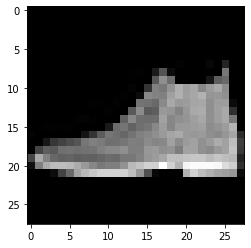

In [ ]:
plt.imshow(test_images[0], cmap='gray')

### Case 1 - Double number of Neurons in Hidden Dense Layer

In the below cell, define a model with double the number of neurons in the dense hidden layer. Then, compile the model, train the model on the training set, and evaluate the model on the test set.



In [ ]:
# TODO - Define model, compile, train, evaluate





---



**Question 3:** Do you observe a difference in loss, accuracy, training time etc and if so list them down. Why do you think that's the case?

**Answer**:



---



### Case 2 - Include Additional Dense Layer

Consider the effects of additional layers in the network instead of just adding more neurons to the same layer.

In the below cell, define a model to add an additional layer with 128 neurons between the two existing Dense layers.

In [ ]:
# TODO - Define Similar Model as before with additional Layer



We then compile the model, fit the model to training data, and evaluate our model on the test data.

In [ ]:
# TODO - compile fit and evaluate the model again




---



**Question 4:** What happens to the error? How does this compare to the original model and the model with double the number of neurons?

**Answer**:



---

# Callbacks

Sometimes if we set the model training for too many epochs we may find that training stops improving. In this case, it would be ideal to quit training early. TensorFlow has a function called ```Callbacks``` which can check the results from each epoch.

Below, we stop training the model when the accuracy is above 86%.

In [ ]:
# define and instantiate your custom Callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if( logs.get('accuracy') > 0.86):
      self.model.stop_training = True


callbacks = myCallback()


In the below cell, re-compile the model, re-fit the model to the training data and re-evaluate the model on the test data! Observe that the training process is much shorter!

**Note:** When you train the model, refer to the myCallback() class object.


***Hint:*** Use the callbacks flag in the `model.fit()` API

In [ ]:
# TODO - re-compile, re-fit and re-evaluate

